#### names 폴더에 있는 데이터


- 2000~2009년 출생한 남여 파일을 읽어서 concat
- 출생한 전체 남녀 합
- 남녀 출생 추이 그래프

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import glob
import pandas as pd
# 비슷한 이름의 파일을 대량으로 한번에 불러옴
#glob 라이브러리에 포함된 glob 메서드는 특정한 패턴의 이름을 가진 
#파일을 한번에 읽어 들일 수 있습니다
file = glob.glob('../data/python_data/names/yob200*')
print(file)

['../data/python_data/names\\yob2000.txt', '../data/python_data/names\\yob2001.txt', '../data/python_data/names\\yob2002.txt', '../data/python_data/names\\yob2003.txt', '../data/python_data/names\\yob2004.txt', '../data/python_data/names\\yob2005.txt', '../data/python_data/names\\yob2006.txt', '../data/python_data/names\\yob2007.txt', '../data/python_data/names\\yob2008.txt', '../data/python_data/names\\yob2009.txt']


In [3]:
birthfile =[]

for csv_filename in file:
    print(csv_filename)
    header = ['name','sex','number']
    df = pd.read_csv(csv_filename,names = header,header = None)
    birthfile.append(df)
    
print(len(birthfile))

../data/python_data/names\yob2000.txt
../data/python_data/names\yob2001.txt
../data/python_data/names\yob2002.txt
../data/python_data/names\yob2003.txt
../data/python_data/names\yob2004.txt
../data/python_data/names\yob2005.txt
../data/python_data/names\yob2006.txt
../data/python_data/names\yob2007.txt
../data/python_data/names\yob2008.txt
../data/python_data/names\yob2009.txt
10


In [4]:
birthfile[0].shape

(29772, 3)

In [5]:
birth_loop_concat = pd.concat(birthfile)
print(birth_loop_concat)

            name sex  number
0          Emily   F   25956
1         Hannah   F   23082
2        Madison   F   19968
3         Ashley   F   17997
4          Sarah   F   17702
...          ...  ..     ...
34704  Zyquarius   M       5
34705      Zyran   M       5
34706    Zyreion   M       5
34707     Zyrian   M       5
34708     Zyvion   M       5

[325229 rows x 3 columns]


In [14]:
counts = birth_loop_concat.number.value_counts(dropna=False)
print(counts)

5       46884
6       33370
7       25045
8       19792
9       15854
        ...  
6466        1
6159        1
5754        1
5700        1
927         1
Name: number, Length: 4690, dtype: int64


ValueError: 'explode' must be of length 'x'

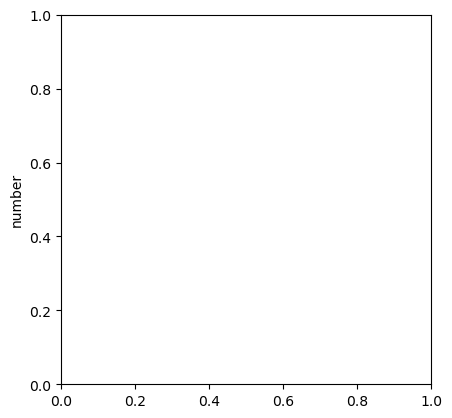

In [15]:
counts.plot.pie(explode=[0,0],autopct = '%1.1f%%',startangle=90)
plt.show()

In [8]:
birthfile =[]
year = 2000

for csv_filename in file:
    print(csv_filename)
    header = ['name','sex','number','year']
    df = pd.read_csv(csv_filename,names = header,header = None)
    df['year']=year
    year += 1
    birthfile.append(df)
    
print(len(birthfile))

../data/python_data/names\yob2000.txt
../data/python_data/names\yob2001.txt
../data/python_data/names\yob2002.txt
../data/python_data/names\yob2003.txt
../data/python_data/names\yob2004.txt
../data/python_data/names\yob2005.txt
../data/python_data/names\yob2006.txt
../data/python_data/names\yob2007.txt
../data/python_data/names\yob2008.txt
../data/python_data/names\yob2009.txt
10


In [9]:
birthfile[3]

,name,sex,number,year
0,Emily,F,25691,2003
1,Emma,F,22706,2003
2,Madison,F,20199,2003
3,Hannah,F,17637,2003
4,Olivia,F,16148,2003
...,...,...,...,...
31180,Zorion,M,5,2003
31181,Zxavian,M,5,2003
31182,Zyad,M,5,2003
31183,Zykeem,M,5,2003


In [10]:
birth_loop_concat = pd.concat(birthfile)
print(birth_loop_concat)

            name sex  number  year
0          Emily   F   25956  2000
1         Hannah   F   23082  2000
2        Madison   F   19968  2000
3         Ashley   F   17997  2000
4          Sarah   F   17702  2000
...          ...  ..     ...   ...
34704  Zyquarius   M       5  2009
34705      Zyran   M       5  2009
34706    Zyreion   M       5  2009
34707     Zyrian   M       5  2009
34708     Zyvion   M       5  2009

[325229 rows x 4 columns]


In [11]:
counts = birth_loop_concat.year.value_counts(dropna=False)
print(counts)

2008    35079
2007    34961
2009    34709
2006    34088
2005    32549
2004    32048
2003    31185
2002    30564
2001    30274
2000    29772
Name: year, dtype: int64


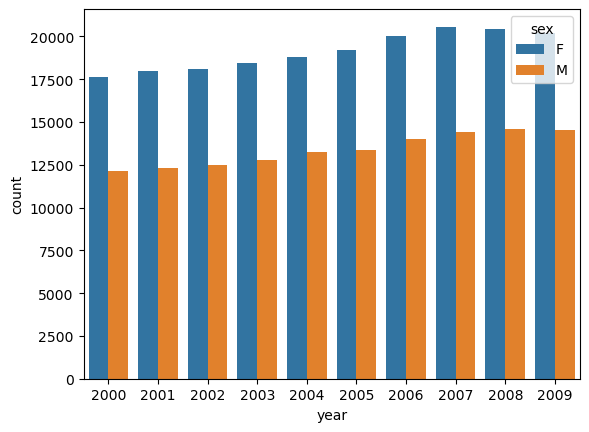

In [12]:
ax = sns.countplot(x='year',hue = 'sex',data = birth_loop_concat)